## Testing effect of Number of Training Samples for Swincell

### Number of Training Samples were set to 5,10,20,25 ...

In [2]:
import glob
from natsort import natsorted
from swincell.utils.utils import batch_matching
import numpy as np

gt_folder = '../../colon_dataset/colon_last5_no_tag_predict/labels/*.tif*'
N_thresholds = 15
thesholds = np.linspace(0.5, 1, N_thresholds)
N_index = [5,10,20,25]  #number of samples in the dataset
# N_index = [25]
for N in N_index:

    pred_folder = f'../../colon_dataset/colon_last5_no_tag_predict/colon_test_N5_128_128_32_1_255_colon_{N}_no_tag_predict_infervmin1/*.tif*'

    gt_files = natsorted(glob.glob(gt_folder))
    pred_files = natsorted(glob.glob(pred_folder))
    # print(len(gt_files),len(pred_files))
    res = batch_matching(gt_files,pred_files,to_instance=True,thresh_list=thesholds)

    res.to_csv(f'../../colon_dataset/colon_last5_no_tag_predict/eval_{N}_eval_15steps.csv')

/home/xzhang/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## load pre-calculated results from csv file

In [12]:
# import pandas as pd
# N =5
# match05 = pd.read_csv(f'../../../colon_dataset/colon_last5_no_tag_predict/eval_{N}_eval.csv')
# df_match05 = match05[match05['thresh']==0.5]
# df_match05.head(10)
# mAP_3d_list =df_match05['precision'].values
# f1_3d_list =df_match05['f1'].values
# recall_3d_list=df_match05['recall'].values
# accuracy_3d_list =df_match05['accuracy'].values
# fn_3d_list=df_match05['fn'].values

# def eval_statistics(df_path,thresh=0.5):
#     df = pd.read_csv(df_path)
#     df_match = df[df['thresh']==thresh]
#     mAP_3d_list =df_match['precision'].values
#     f1_3d_list =df_match['f1'].values
#     recall_3d_list=df_match['recall'].values
#     accuracy_3d_list =df_match['accuracy'].values
#     fn_3d_list=df_match['fn'].values
#     return mAP_3d_list,f1_3d_list,recall_3d_list,accuracy_3d_list,fn_3d_list
# N=5
# mAP_3d_list05,f1_3d_list05,recall_3d_list05,accuracy_3d_list05,fn_3d_list05 = eval_statistics(f'../../../colon_dataset/colon_last5_no_tag_predict/eval_{N}_eval.csv')

,Unnamed: 0,criterion,thresh,fp,tp,fn,precision,recall,accuracy,f1,n_true,n_pred,mean_true_score,mean_matched_score,panoptic_quality,img_id
0,0,iou,0.5,394,376,100,0.488312,0.789916,0.432184,0.603531,476,770,0.616441,0.780388,0.470989,image-labels_0025.tif
5,0,iou,0.5,328,400,79,0.549451,0.835073,0.495663,0.662800,479,728,0.669839,0.802132,0.531654,image-labels_0026.tif
10,0,iou,0.5,325,370,91,0.532374,0.802603,0.470738,0.640138,461,695,0.633369,0.789143,0.505161,image-labels_0027.tif
15,0,iou,0.5,416,330,90,0.442359,0.785714,0.394737,0.566038,420,746,0.613837,0.781247,0.442215,image-labels_0028.tif
20,0,iou,0.5,298,344,70,0.535826,0.830918,0.483146,0.651515,414,642,0.660963,0.795462,0.518255,image-labels_0029.tif


In [3]:
import pandas as pd
output_df = pd.DataFrame()
for N in N_index:
    match_cur = pd.read_csv(f'../../colon_dataset/colon_last5_no_tag_predict/eval_{N}_eval_15steps.csv')
    match_cur['N_sample'] = N
    output_df = pd.concat([output_df,match_cur])

del output_df['Unnamed: 0']
output_df.to_csv(f'../../colon_dataset/colon_last5_no_tag_predict/eval_all_15steps.csv',index=False)

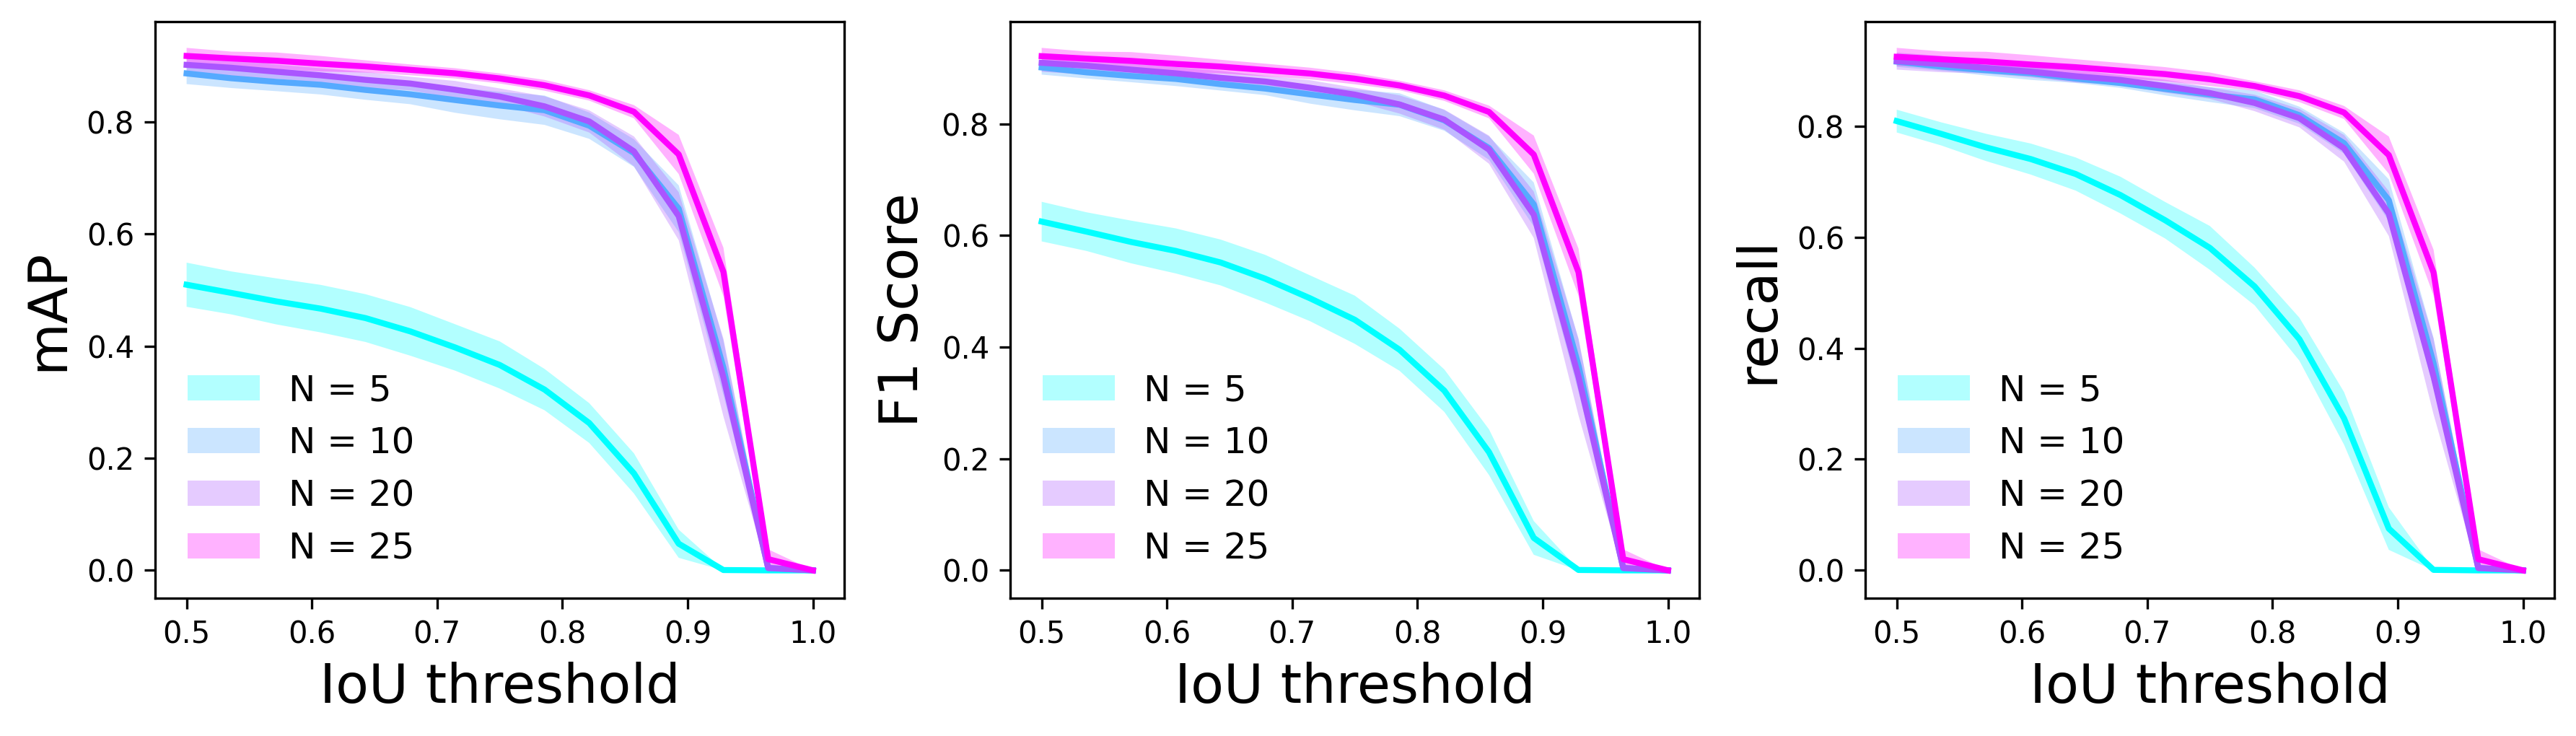

In [4]:
import numpy as np
from swincell.utils.utils import plot_with_std
import matplotlib.pyplot as plt
# N_thresholds = 15
iou_thresholds = np.linspace(0.5,1,N_thresholds)
output_3d = output_df
# print(output_3d.head())
f1_3d_list5 =output_3d[output_3d['N_sample']==5]['f1'].values.reshape(5,N_thresholds)  
f1_3d_list10 =output_3d[output_3d['N_sample']==10]['f1'].values.reshape(5,N_thresholds)
f1_3d_list20 =output_3d[output_3d['N_sample']==20]['f1'].values.reshape(5,N_thresholds)
f1_3d_list25 =output_3d[output_3d['N_sample']==25]['f1'].values.reshape(5,N_thresholds)

mAP_3d_list5 =output_3d[output_3d['N_sample']==5]['precision'].values.reshape(5,N_thresholds)  
mAP_3d_list10 =output_3d[output_3d['N_sample']==10]['precision'].values.reshape(5,N_thresholds)
mAP_3d_list20 =output_3d[output_3d['N_sample']==20]['precision'].values.reshape(5,N_thresholds)
mAP_3d_list25 =output_3d[output_3d['N_sample']==25]['precision'].values.reshape(5,N_thresholds)

recall_3d_list5 =output_3d[output_3d['N_sample']==5]['recall'].values.reshape(5,N_thresholds)  
recall_3d_list10 =output_3d[output_3d['N_sample']==10]['recall'].values.reshape(5,N_thresholds)
recall_3d_list20 =output_3d[output_3d['N_sample']==20]['recall'].values.reshape(5,N_thresholds)
recall_3d_list25 =output_3d[output_3d['N_sample']==25]['recall'].values.reshape(5,N_thresholds)
#----------------
n_samples = [5, 10, 20, 25]
# colors = plt.cm.viridis(np.linspace(0, 1, len(n_samples)))
# colors = plt.cm.Reds(np.linspace(0, 1, len(n_samples)))
colors = plt.cm.cool(np.linspace(0, 1, len(n_samples)))
#------------------------
fig,ax = plt.subplots(1,3,figsize=(12,3.5), dpi=300)
plot_with_std(ax[0],mAP_3d_list5,iou_thresholds,label='N = 5',color=colors[0])
plot_with_std(ax[0],mAP_3d_list10,iou_thresholds,label='N = 10',color=colors[1])
plot_with_std(ax[0],mAP_3d_list20,iou_thresholds,label='N = 20',color=colors[2])
plot_with_std(ax[0],mAP_3d_list25,iou_thresholds,label='N = 25',color=colors[3])
ax[0].legend(loc='lower left',frameon=False,fontsize=12)
ax[0].set_ylabel('mAP',fontsize =18)
ax[0].set_xlabel('IoU threshold',fontsize =18)

plot_with_std(ax[1],f1_3d_list5,iou_thresholds,label='N = 5',color=colors[0])
plot_with_std(ax[1],f1_3d_list10,iou_thresholds,label='N = 10',color=colors[1])
plot_with_std(ax[1],f1_3d_list20,iou_thresholds,label='N = 20',color=colors[2])
plot_with_std(ax[1],f1_3d_list25,iou_thresholds,label='N = 25',color=colors[3])
ax[1].legend(loc='lower left',frameon=False,fontsize=12)
ax[1].set_ylabel('F1 Score',fontsize =18)
ax[1].set_xlabel('IoU threshold',fontsize =18)

plot_with_std(ax[2],recall_3d_list5,iou_thresholds,label='N = 5',color=colors[0])
plot_with_std(ax[2],recall_3d_list10,iou_thresholds,label='N = 10',color=colors[1])
plot_with_std(ax[2],recall_3d_list20,iou_thresholds,label='N = 20',color=colors[2])
plot_with_std(ax[2],recall_3d_list25,iou_thresholds,label='N = 25',color=colors[3])
ax[2].legend(loc='lower left',frameon=False,fontsize=12)
ax[2].set_ylabel('recall',fontsize =18)
ax[2].set_xlabel('IoU threshold',fontsize =18)

fig.tight_layout()


